In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d

In [7]:
#a
#constants
L = 1
g = 9.81
wo = np.sqrt(g/L)
T = 2*np.pi*(1/wo)
#function making the ODE
def dy_dt(y,t,wo):
    y1, y2 = y
    dydt = [y2, -wo**2*np.sin(y1)]
    return dydt
#more constants
diff = 0.01 * T
t_start = 0.
t_end = 4. 
nt = 10000 
t = np.linspace(t_start, t_end, nt)
#theta value that was used for the initial condition
theta0 = np.pi/10
y0 = [theta0, 0.]
#solving the ODE
sol = integrate.odeint(dy_dt, y0, t, args=(wo,))

In [10]:
theta = sol[0,0]
k = 0
#takes all the solution values greater than 0
while theta > 0.:
    k += 1
    theta = sol[k,0]
        
k = k+10 
#interpolates the data given to produce a better period
f = interp1d(sol[0:k,0],t[0:k])
period = 4.*f(0.)
print("Using a range of ", format(T - diff, '.5f'), " =< Period =< ", 
      format(T + diff,'.5f'), "the angle ")
print(format(theta0,'.5f'),"was used to find a period of ", 
      format(period, '.5f'), "using a theoretical period value of ", 
      format(T, '.5f'))

Using a range of  1.98601  =< Period =<  2.02613 the angle 
0.31416 was used to find a period of  2.01851 using a theoretical period value of  2.00607


In [12]:
#b
#ODE with delta included
def dy1_dt(y,t,wo,delta):
    y1,y2 = y
    dydt = [y2, -wo**2*np.sin(y1)*(1-delta*abs(np.sin(y1)))]
    return dydt
#constants
t_start = 0.
t_end = 8.
nt = 10000
t = np.linspace(t_start,t_end,nt)
#linspace for varying delta
delt = np.linspace(0.,1.,20)
theta0 = np.pi/2
#initial condition
y0 = [theta0,0.]
#array meant for putting values in
period = np.linspace(0,0,10)
#puts different delta values in, and solves the ODE based on those
#delta values; same function as the code found in part a
for i in range(10):
    sol = integrate.odeint(dy1_dt, y0, t, args = (wo,delt[i]))
    theta = sol[0,0]
    k = 0
    while theta > 0.:
        k += 1
        theta = sol[k,0]
    k += 20
    f = interp1d(sol[0:k,0],t[0:k])
    period[i] = 4.*f(0.)

Text(0, 0.5, 'Period (s)')

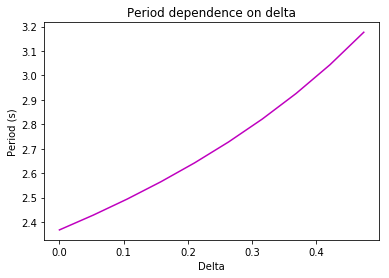

In [13]:
#functions for plotting the graph
plt.plot(delt[0:10], period[0:10], color = 'm')
plt.title("Period dependence on delta")
plt.xlabel("Delta")
plt.ylabel("Period (s)")

### Part c
If $\delta$ = 1, by the equation $\frac{qE_0}{mg} \equiv \delta$, this would indicate that $qE_0 = mg$, which would mean that the Lorentz force is directly equal to the force of gravity acting on the system. Since there are no more forces acting on the system, this would result in the pendulum being in equilibrium, meaning it would be stationary at a given point in space.